# Sales Application

In [1]:
# Import necessary tkinter widgets for this project
from tkinter import Tk, Label, Button, LabelFrame, Entry, Frame, messagebox, ttk

# For file manipulation
import pickle
import os

In [2]:
class SalesApp:
    ## This class contains all the necessary functions and variebles for the Sales application ##
    ## Basically it will create a nice Gui application where users can save sales details 
    ## can also view the sales records
    def __init__(self, master):
        # This function executes automatically when we call class "SalesApp" #

        ## Setup root window which holds all widgets ##
        self.master = master
        master.title("A simple GUI")
        master.geometry("500x600")
        master.resizable(0,0)
        ###############################################

        Label(master, text="...................... Sales App ......................",font="Helvetica 20 bold").pack(side='top',padx=5,pady=5)
        
        HolderFrame = Frame(master) # HolderFrame holds Two frames
        HolderFrame.pack(expand=True,fill='both')

        ## First Frame inside Holder Frame ############################################################################
        # This frame holds user input widgets 

        insert_records_frame = LabelFrame(HolderFrame,text=" Insert Record ")
        insert_records_frame.pack(side='left',expand=True,fill='both',padx=5,pady=5)

        self.widget_list = [] # This list holds the widgetname name widget itself i.e, [(widgetname,<widget>)]

        self.irf_widgets = {0:"Sales_Id",1:"Product_Name",2:"Price",3:"QTY"} # This dictionery holds position and widgetname 
        for position,widgetname in self.irf_widgets.items():
            Label(insert_records_frame,text=f"{widgetname}:",font="Helvetica 9 bold").grid(row=position,column=0,padx=2,pady=2,sticky='e')
            self.widget_list.append([widgetname,])
            widgetname = Entry(insert_records_frame)
            widgetname.grid(row=position,column=1,padx=2,pady=2)
            self.widget_list[position].insert(1,widgetname)
        
        ## For loop logic ##
        # This for loop creates 5 lables and 5 entry boxes for user input
        # This loop also adds widget name and widget itself into widget_list for future use

        irf_btn = Button(insert_records_frame,text="Save",command=self.create_records).grid(row=5,column=1,padx=5,pady=5) 
        # irf_btn will call create_records function which is used to save the user input into pickled file
        # Detailed explanation in function

        ###############################  End of First Frame in Holder Frame ############################################

        ## Second Frame inside Holder Frame ############# Second frame holds two frame ###############################

        search_records_frame = Frame(HolderFrame) # This frame holds search record widgets
        search_records_frame.pack(side='left',fill='both',expand=True,padx=5,pady=5)

        srf_frame1 = Frame(search_records_frame) # This frame holds user input widgets
        srf_frame1.pack()
        
        Label(srf_frame1,text=" Enter Sales_ID ").pack()
        self.srf_entry = Entry(srf_frame1)
        self.srf_entry.pack()
        srf_btn = Button(srf_frame1,text="OK",command=self.fetch_records).pack()
        # srf_btn will call fetch_records function which will depickle the file and show us the record we want
        # Detailed explanation in function

        self.srf_frame2 = LabelFrame(search_records_frame,text=" Records ") # This frame shows the fetched record
        self.srf_frame2.pack(expand=True,fill='both')

        #### End of second Frame in holder frame ###############################################################

        #### Tree view frame #############################################
        # This frame shows us the saved records in row and column format 

        view_records_frame = LabelFrame(master,text=" Records ") 
        view_records_frame.pack(expand=True,fill='both',padx=5,pady=5)
        vrf_treeview_frame = Frame(view_records_frame) # This frame holds the treeview row and columns only
        vrf_treeview_frame.pack(padx=5,pady=5)

        self.vrf_treeview = ttk.Treeview(vrf_treeview_frame)
        self.vrf_treeview.pack(side="right")

        # Constructing vertical scrollbar with treeview
        verscrlbar = ttk.Scrollbar(vrf_treeview_frame,
                                orient ="vertical",
                                command = self.vrf_treeview.yview)
        
        # This will pack the scroll bar
        verscrlbar.pack(side ='left', fill ='y')
        
        # Configuring treeview
        self.vrf_treeview.configure(xscrollcommand = verscrlbar.set)
        treeviewcolumns = {0:"Sales_Id",1:"Product_Name",2:"Price",3:"QTY",4:"Total_sales"}

        self.vrf_treeview["columns"] = (treeviewcolumns.keys())
        # Defining heading
        self.vrf_treeview['show'] = 'headings' # This will show the headings i,e "sales_id" "price" etc

        self.vrf_treeview.tag_configure('oddrow',background="white") 
        self.vrf_treeview.tag_configure('evenrow',background="lightblue")
        # This both tags will create us the odd and even color in treeview
        # Its not mandotary but it will looks good in eyes

        
        for position,names in treeviewcolumns.items():
            self.vrf_treeview.column(position,width=90)
            self.vrf_treeview.heading(position, text = names)

        ## For loop ##
        # This for loop finally set the headings and how many columns in treeview

        vrf_btn = Button(view_records_frame,text="Refresh",command=self.view_records)
        vrf_btn.pack(padx=5,pady=5)
        # vrf_btn will call view_records function which will fetch every data from sales.pickle file
        # Detailed Explanation in function

         
    def create_records(self):
        ## This function will get the user input values and store the data in pickled file format
        with open('sales.pickle','ab') as f:
            # First we create the 'sales.pickle' file if it does not exists
            pass

        sales_dict = {} # This dictionery will holds the respective user given value
        if any(len(f[1].get()) == 0 for f in self.widget_list):
            # Check if any fields are empty
            messagebox.showerror("Error","Please provide some data")
        else:
            for name,entry in self.widget_list:
                sales_dict[name] = entry.get()
            sales_dict["Total_sales"] = int(sales_dict["Price"]) * int(sales_dict["QTY"]) 
            # This loop take advantage of widget_list and stores in dictionery
            # i,e this will looks like
            # {{"sales_id": 'xxx',"price":888 ...........},{.......}}

            if os.stat("sales.pickle").st_size == 0:
                # we check if file is empty or not
                # if empty means we can just directly pickle the data
                with open('sales.pickle', 'ab') as f:
                    pickle.dump(sales_dict, f)
            else:
                # if not empty means we will fetch all data and check if sales id is exists or not
                # This will prevent duplicate records
                data = []
                with open('sales.pickle', 'rb') as f:
                    while True:
                        try:
                            data.append(pickle.load(f))
                        except EOFError:
                            break
                    # This while loop will depickle every records and stores in data list

                if any(items["Sales_Id"] == sales_dict["Sales_Id"] for items in data):
                    # we check user input sales id with sales id in sales.pickle file
                    messagebox.showerror("Error","Data already exists")
                else:
                    # if not match means sales id is unique and we save that in file
                    with open('sales.pickle', 'ab') as f:
                        pickle.dump(sales_dict, f)
                        
    def fetch_records(self):
        # This function will fetch the record the user wants and display it in srf_frame2 
        if len(self.srf_entry.get())==0:
            # we check if user input is empty or not
            messagebox.showerror("Error","Please enter sales id")
        else:
            data = []
            with open('sales.pickle', 'rb') as f:
                while True:
                    try:
                        data.append(pickle.load(f))
                    except EOFError:
                        break
                # This while loop will depickle every records and stores in data list

            fetched = [items for items in data if items["Sales_Id"] == self.srf_entry.get()]
            # This fetched list will the required records the user wants
            # what happens in list comprehension is 
            # we loop through each item in data list and chek if salesid is equal to user inputed salesid
            if len(fetched)==0:  
                # if fetched record is empty means that sales id record is not available
                messagebox.showerror("Error","Sales_Id not exists")
            else:
                position = 0
                for name,value in fetched[0].items():
                    Label(self.srf_frame2,text=f"{name}:").grid(row=position,column=0,padx=2,pady=2,sticky='e')
                    Label(self.srf_frame2,text=value,font="Helvetica 9 bold").grid(row=position,column=1,padx=2,pady=2,sticky='w')
                    position +=1
                # This loop will display fetched record from sales id and display as lables in srf_frame2
    
    def view_records(self):
        # This function will fetch all records from sales.pickle file and display that records in tkinter tree view
        for item in self.vrf_treeview.get_children():
            self.vrf_treeview.delete(item)
        # This loop will delets the records inside treeview
        # if we dont do that same records will fetch again and again 
        
        data = []
        with open('sales.pickle', 'rb') as f:
            while True:
                try:
                    data.append(pickle.load(f))
                except EOFError:
                    break
            # While loop will fetch all records from sales.pickle file and stores in data list
        count = 0 # This count varieble is used to for the treeview diffenrent color effect
        for items in data:
            if count %2 ==0:
                self.vrf_treeview.insert("", 'end', iid = count,values =[f for f in items.values()],tags=('evenrow',))
            else:
                self.vrf_treeview.insert("", 'end', iid = count,values =[f for f in items.values()],tags=('oddrow',))
            count += 1
        # This loop will basically insert the fetched data by calling tags
        # so basically first row will be lightblue color second row will be white color and third row will be lightblue and so on
        
root = Tk()
my_gui = SalesApp(root) # finally we pass the root window by calling salesapp class
root.mainloop() # This will holds the root window until the user closes the window, it is more like a loop 

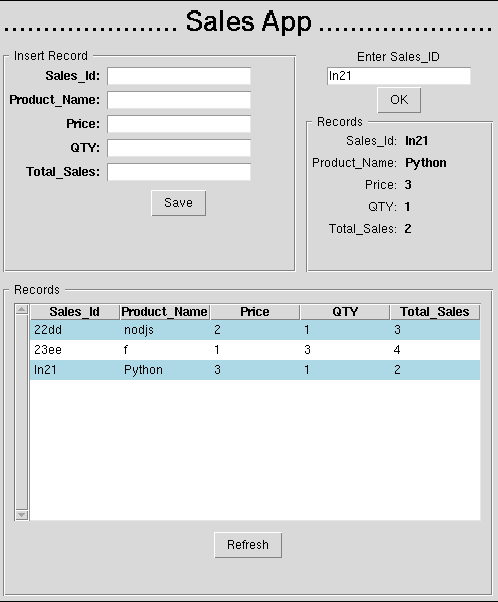

# Archiving Sales application data script  
This script will execute daily at midnight  
Basically this script will archive the "sales.pickle" file in parquet format in another location

In [6]:
#!/usr/bin/python

import pandas as pd
import os
from datetime import date

data = []
with open('sales.pickle', 'rb') as f:
    while True:
        try:
            data.append(pickle.load(f))
        except EOFError:
            break
df = pd.DataFrame(data)
archive_path = f"Archive/{date.today()}"
try: 
    os.mkdir(archive_path) 
except OSError as error: 
    print(error)  

df.to_parquet(path="archive_path")
if os.path.exists("sales.pickle"):
  os.remove("sales.pickle")
else:
  pass

# Cron Information
#       field          allowed values
#          -----          --------------
#          minute         0-59
#          hour           0-23
#          day of month   1-31
#          month          1-12 (or names, see below)
#          day of week    0-7 (0 or 7 is Sun, or use names)

# Cron Tab to run daily at midnight
# 0 0 * * * "/home/user/script.sh"


In [25]:
df

,Sales_Id,Product_Name,Price,QTY,Total_Sales
0,22dd,nodjs,2,1,3
1,23ee,f,1,3,4


In [14]:
data

[{'Sales_Id': '22dd',
  'Product_Name': 'nodjs',
  'Price': '2',
  'QTY': '1',
  'Total_Sales': '3'},
 {'Sales_Id': '23ee',
  'Product_Name': 'f',
  'Price': '1',
  'QTY': '3',
  'Total_Sales': '4'},
 {'Sales_Id': 'In21',
  'Product_Name': 'Python',
  'Price': '3',
  'QTY': '1',
  'Total_Sales': '2'},
 {'Sales_Id': 'demo1',
  'Product_Name': 'java',
  'Price': '1',
  'QTY': '3',
  'Total_Sales': '4'}]

In [7]:
import os
from datetime import date
archive_path = f"Archive/{date.today()}"
try: 
    os.mkdir(archive_path) 
except OSError as error: 
    print(error)  


[Errno 17] File exists: 'Archive/2023-01-06'


In [5]:
from datetime import date
f"todays date:{date.today()}"

'todays date:2023-01-06'

In [7]:
pd.read_parquet("Archive/")

,Sales_Id,Price,QTY,Total_Sales,Product_Name
0,In21,3,1,2,Python
1,23ee,1,3,4,f
2,23ee,1,3,4,f
3,demo1,1,3,4,java
4,22dd,2,1,3,nodjs
5,22dd,2,1,3,nodjs
